In [136]:
import tensorflow
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [137]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [138]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [139]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [140]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True).astype(int)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [141]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [144]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train_trans=sc.fit_transform(X_train)
X_test_trans=sc.transform(X_test)

In [145]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

d:\PYTHON\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [146]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [147]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [148]:
history=model.fit(X_train_trans,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4048 - loss: 0.7973 - val_accuracy: 0.7887 - val_loss: 0.4902
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.7830 - loss: 0.4764 - val_accuracy: 0.8033 - val_loss: 0.4458
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.7931 - loss: 0.4479 - val_accuracy: 0.8227 - val_loss: 0.4300
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.8093 - loss: 0.4291 - val_accuracy: 0.8273 - val_loss: 0.4197
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.8184 - loss: 0.4185 - val_accuracy: 0.8320 - val_loss: 0.4084
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.8277 - loss: 0.4026 - val_accuracy: 0.8340 - val_loss: 0.3985
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.8416 - loss: 0.3810 - val_accuracy: 0.8380 - val_loss: 0.3905
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.8473 - loss: 0.3735 - va

In [149]:
y_pred=model.predict(X_test_trans)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step


In [150]:
y_pred

array([[0.02636264],
       [0.02633095],
       [0.16664743],
       ...,
       [0.01748816],
       [0.13706587],
       [0.01591874]], dtype=float32)

In [151]:
y_pred=np.where(y_pred>0.5,1,0)

In [152]:
print(accuracy_score(y_test,y_pred))

0.8556


In [155]:
history.history

{'accuracy': [0.5824999809265137,
  0.7960000038146973,
  0.8044999837875366,
  0.8151666522026062,
  0.8216666579246521,
  0.8291666507720947,
  0.8363333344459534,
  0.843666672706604,
  0.8475000262260437,
  0.8504999876022339,
  0.8538333177566528,
  0.8543333411216736,
  0.8546666502952576,
  0.8551666736602783,
  0.8571666479110718,
  0.8578333258628845,
  0.8586666584014893,
  0.859333336353302,
  0.8588333129882812,
  0.859000027179718],
 'loss': [0.6673458814620972,
  0.4586383104324341,
  0.4352218508720398,
  0.4222724139690399,
  0.40960991382598877,
  0.3969772458076477,
  0.3854944109916687,
  0.3750666081905365,
  0.3664560616016388,
  0.36012333631515503,
  0.35531601309776306,
  0.35145971179008484,
  0.34887999296188354,
  0.34740856289863586,
  0.3452886939048767,
  0.34456419944763184,
  0.34360232949256897,
  0.3422277867794037,
  0.3412606716156006,
  0.34017446637153625],
 'val_accuracy': [0.7886666655540466,
  0.8033333420753479,
  0.8226666450500488,
  0.827333

In [153]:
history.history['loss']

[0.6673458814620972,
 0.4586383104324341,
 0.4352218508720398,
 0.4222724139690399,
 0.40960991382598877,
 0.3969772458076477,
 0.3854944109916687,
 0.3750666081905365,
 0.3664560616016388,
 0.36012333631515503,
 0.35531601309776306,
 0.35145971179008484,
 0.34887999296188354,
 0.34740856289863586,
 0.3452886939048767,
 0.34456419944763184,
 0.34360232949256897,
 0.3422277867794037,
 0.3412606716156006,
 0.34017446637153625]

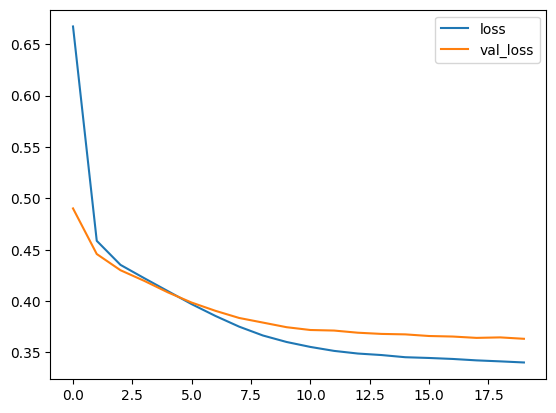

In [158]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

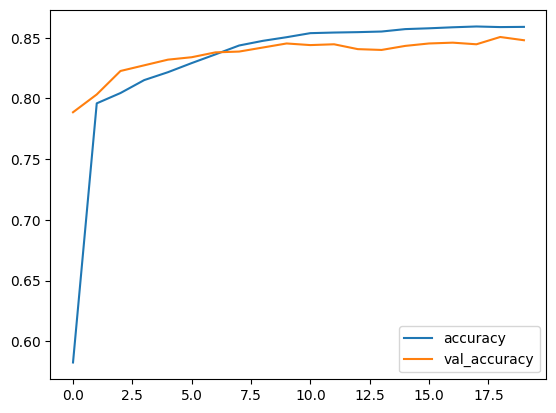

In [160]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()